# Introduccion a la Visualizacion de Datos.


Algunos años atrás el reto era como obtener millones de datos, pero en la actualidad esto ya no es un problema, no más hay que visitar el sitio web de [ChEMBL](https://www.ebi.ac.uk/chembl/) donde podemos encontrar una cantidad interesante de moléculas bioactivas con ciertas características para ser convertidas en medicamentos.

Si bien el campo de los datos va más allá de su manipulación, también como científicos es valioso desarrollar habilidades relacionadas con la presentación de nuestros hallazgos. Y si quisiéramos ir un poco más allá, algo importante a tener en cuenta aparte de una buena visualización es tener una historia que contar.

En Notebooks anteriores aprendimos a manipular algunos conjuntos de datos y para ello vimos desde lo básico de Python hasta lo más avanzado como lo son los [DataFrame](../2_PART_TWO/2.1_Dataframes.ipynb), ahora es tiempo de aprender a crear gráficas *(Visualizaciones)* de nuestros datos utilizando dos de las librerías más famosas en el mundo `Matplotlib` y `Seaborn`. Para la mayoría de los casos, con la primera de éstas sería más que suficiente, pero para realizar gráficas un poco más complejas vamos a utilizar la segunda. Con ellas dos trataremos de crear la mayoría de visualizaciones más populares.

### Introduccion a Matplotlib

Según el sitio web **Matplotlib es una libreria para la creacion de visualizaciones estáticas, animadas e intercativas en Python**. Simple, ¿recuerdan el concepto de Libreria? Si no [aqui](https://www.geeksforgeeks.org/libraries-in-python/) pueden leer un poco más al respecto. No hay mucho que agregar, más alla de que la libreria ya se encuentra instalada como parte de las dependencias del ambiente virtual del curso.

> En caso de que la librería no esté instalada, puede utilizar el comnado `pip install matplotlib`, o `conda install matplotlib`.

Antes de empezar a graficar es bueno desarrollar un entendimiento basico de como funciona esta libreria, dado que en muchos escenarios veremos que es necesario realizar ciertas configuraciones.

#### El modulo Pyplot

Por lo general el módulo `pyplot` es el foco de interés cuando queremos gráficas con `Matplotlib`, a pesar de que la librería posee una gran variedad de funcionalidades asociadas a otras características como la configuración de los estilos y las animaciones. Por lo general, siempre importaremos el módulo de la siguiente forma:

```
    import matplotlib.pyplot as plt
```

Para crear una gráfica o **plot** debemos seguir una serie de pasos o llamados de ciertas funciones *(métodos)* que pertenecen al módulo `pyplot`.


Veamos cómo se hace a continuación, empecemos importando el dataset de [EGG del invididuo 364](./data/co2a0000364.rd.000) y el [EEG del individuo 365](./data/co2a0000365.rd.003) para luego ser convertidos en DataFrames:

In [1]:
# Se importa librerias
import calendar, random, datetime
import pandas as pd
import numpy as np

# Se cargan los datos generados por el EEG para los sujetos 364 y 365, se da nombde a las columnas
df_alcoholisim364 = pd.read_csv("./data/co2a0000364.rd.000", delimiter=" ", skiprows=5, names=["trial_number", "sensor_position", "sample_number", "sensor_value"])
df_alcoholisim365 = pd.read_csv("./data/co2a0000365.rd.003", delimiter=" ", skiprows=5, names=["trial_number", "sensor_position", "sample_number", "sensor_value"])

# funcion que genera fechas de forma aleatoria
def random_date(start, end):
    return start + datetime.timedelta(seconds=random.randint(0, int((end - start).total_seconds())))

# Se generan la cantidad de fechas necesarias de acuerdo al número de observaciones del EEG
dates_arr_subject364 = np.array([pd.to_datetime(random_date(datetime.datetime(day=1, month=1, year=2000), datetime.datetime(day=31, month=12, year=2022))) for i in range(len(df_alcoholisim364))])
dates_arr_subject365 = np.array([pd.to_datetime(random_date(datetime.datetime(day=1, month=1, year=2000), datetime.datetime(day=31, month=12, year=2022))) for i in range(len(df_alcoholisim365))])

# Se generan los dataframes a partir de los datos del EEG y las fechas
df_subject365 = df_alcoholisim365.join(pd.DataFrame(dates_arr_subject365, columns=['datetime'])).sort_values(by="datetime")
df_subject364 = df_alcoholisim364.join(pd.DataFrame(dates_arr_subject364, columns=['datetime'])).sort_values(by="datetime")

# Se visualiza el Dataframe del sujeto 365
df_subject365

,trial_number,sensor_position,sample_number,sensor_value,datetime
13594,3,C1,230,0.041,2000-01-01 02:00:51
55,3,FP1,55,-1.587,2000-01-02 05:32:33
15164,3,P2,1,-6.012,2000-01-03 06:39:35
5302,3,CP1,162,-2.472,2000-01-03 07:28:01
13945,3,PO7,67,39.988,2000-01-03 09:03:47
...,...,...,...,...,...
1004,3,F8,233,-7.874,2022-12-29 17:25:06
1320,3,AF2,35,-0.722,2022-12-29 18:32:07
11788,3,TP8,223,6.683,2022-12-30 07:59:20
10615,3,C6,78,3.001,2022-12-30 11:42:29


In [38]:
### CAMILO
# Se importa librerias
import calendar, random, datetime
import pandas as pd
import numpy as np

# Se cargan los datos generados por el EEG para los sujetos 364 y 365, se da nombde a las columnas
df_alcoholisim364 = pd.read_csv("./data/co2a0000364.rd.000", delimiter=" ", skiprows=5, names=["trial_number", "sensor_position", "sample_number", "sensor_value"])
df_alcoholisim365 = pd.read_csv("./data/co2a0000365.rd.003", delimiter=" ", skiprows=5, names=["trial_number", "sensor_position", "sample_number", "sensor_value"])

# Limpiar datos, quitar las observaciones (trial_number = #)
df_alcoholisim364 = df_alcoholisim364[df_alcoholisim364['trial_number'] != '#']
# los datos son de un segundo (256 datos en un segundo, por sensor), crear la variable de tiempo para cada sensor
# ver https://kdd.ics.uci.edu/databases/eeg/eeg.data.html
time = np.linspace(0,1,256)
# colocar time en cada sensor (64 veces)
all_time = np.array(list(time) * 64)
#crear columna
df_alcoholisim364['time'] = all_time
# quitar 'trial_number' y 'sample_number'
df_alcoholisim364.drop(['trial_number', 'sample_number'], axis=1, inplace=True)
df_alcoholisim364

,sensor_position,sensor_value,time
0,FP1,-8.921,0.000000
1,FP1,-8.433,0.003922
2,FP1,-2.574,0.007843
3,FP1,5.239,0.011765
4,FP1,11.587,0.015686
...,...,...,...
16442,Y,6.571,0.984314
16443,Y,12.431,0.988235
16444,Y,15.849,0.992157
16445,Y,16.337,0.996078


Una vez importados los datos, empezaremos con la creación de la primera gráfica y para ello, es necesario invocar el método `plot`, de la siguiente forma:

```comand
    plt.plot(x-axis, y-axis)
```

en donde `x-asix` y `y-axis` son los valores para los ejes respectivos del gráfico, y notemos que aun a este punto no tenemos nuestra visualización, porque para ello es necesario invocar el método `show` como lo vemos a continuación:

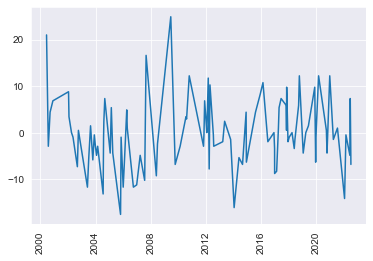

In [39]:
# Se importa el módulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se hace un subset de las lecturas de los sensores en la posicion T8
df_sample = df_subject364[df_subject364["sensor_position"] == "T8"].sample(n=100).sort_values(by="datetime")

# Se crea la gráfica por medio del metodo plot
plt.plot(df_sample.datetime, df_sample.sensor_value)

# Se rotan las etiquetas del eje x 90
plt.xticks(rotation=90)

# Se visualiza la grafica
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_41552\502638458.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sample = df_alcoholisim364[df_subject364["sensor_position"] == "T8"]


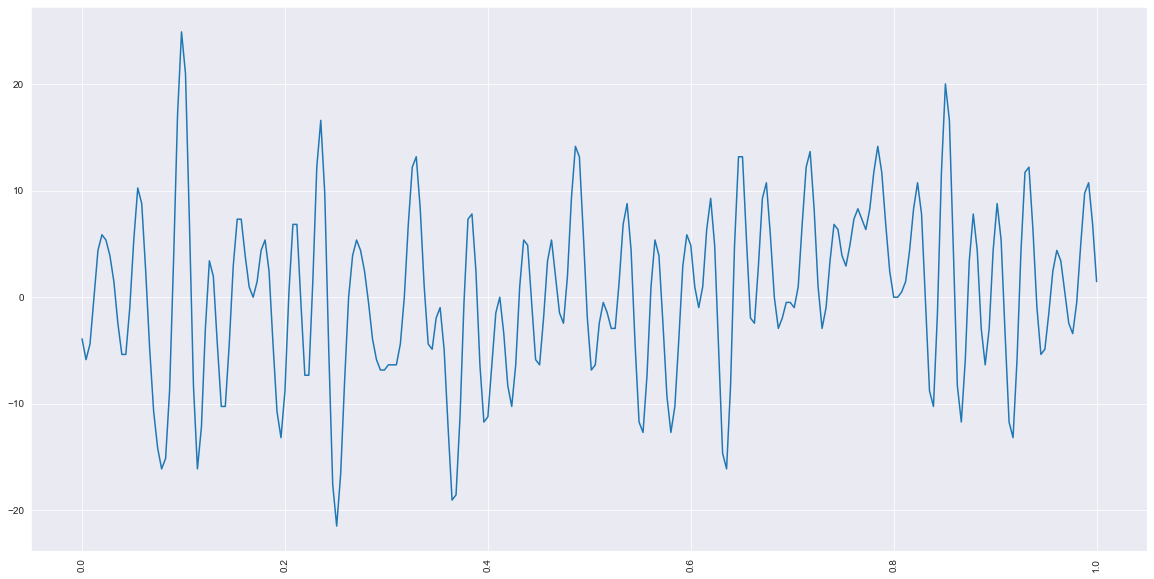

In [42]:

# CAMILO# Se importa el módulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se hace un subset de las lecturas de los sensores en la posicion T8
df_sample = df_alcoholisim364[df_subject364["sensor_position"] == "T8"]
fig = plt.subplots(figsize=(20, 10))
# Se crea la gráfica por medio del metodo plot
plt.plot(df_sample.time, df_sample.sensor_value)

# Se rotan las etiquetas del eje x 90
plt.xticks(rotation=90)

# Se visualiza la grafica
plt.show()

### arreglar

Como resultado tenemos un gráfico de líneas o por su nombre en inglés un **Line Plot**. En el se puede observar la lectura del EEG, para uno de los sensores en la posición *P8*, este valor se encuentra en microvoltios, es decir es un valor numérico que representa una medición eléctrica. [Clic aquí para saber un poco más sobre el dataset](https://archive-beta.ics.uci.edu/ml/datasets/eeg+database#Papers).

En resumen, para la realización de una gráfica con `Matplotlib`, se deben seguir los siguientes pasos:

1. Se debe importar el módulo `pyplot` de la librería `Matplotlib`
2. Se debe inicializar la gráfica por medio del método `plot`.
3. Una vez terminada la inicialización y configuración del **plot** se debe invocar la visualización por medio del método `show`.

A veces es necesario crear una gráfica de líneas para comparar dos variables, por ejemplo si quisiéramos ver la gráfica de la variación de los valores del sensor en la posición *C1* del individuo 364 en comparación con los valores del sensor en la misma posición del individuo 365, hariamos lo siguiente:

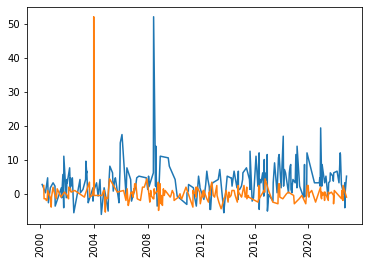

In [12]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se hacen un subconjunto de los valores asociados a las lecturas del sensor en la posicion C1
df_subject364_sample = df_subject364[df_subject364["sensor_position"] == "C1"].sample(n=200).sort_values(by="datetime")
df_subject365_sample = df_subject365[df_subject365["sensor_position"] == "C1"].sample(n=200).sort_values(by="datetime")

# Se crea la grafica por medio del metodo plot
plt.plot(df_subject364_sample.datetime, df_subject364_sample.sensor_value)
plt.plot(df_subject365_sample.datetime, df_subject365_sample.sensor_value)

# Se rotan las etiquetas del eje x 90
plt.xticks(rotation=90)

# Se visualiza la grafica
plt.show()

Se pueden notar como los valores siguen una tendencia muy similar, pero la gráfica a primera vista no nos dice de que se trata, qué tal si le agregamos un poco de presentación.

Ahora, vamos a darle un título y un nombre a sus ejes, y porque no visualizar los datos en una grilla:

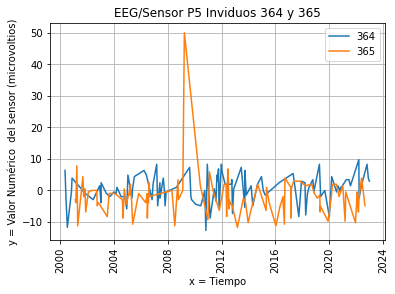

In [19]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se hacen un subconjunto de los valores asociados a las lecturas del sensor en la posicion P5
df_subject364_sample = df_subject364[df_subject364["sensor_position"] == "P5"].sample(n=100).sort_values(by="datetime")
df_subject365_sample = df_subject365[df_subject365["sensor_position"] == "P5"].sample(n=100).sort_values(by="datetime")

# Se crea la grafica por medio del metodo plot
plt.plot(df_subject364_sample.datetime, df_subject364_sample.sensor_value)
plt.plot(df_subject365_sample.datetime, df_subject365_sample.sensor_value)

# Se habilita la grilla
plt.grid(True)

# Se le da un nombre a los ejes
plt.xlabel('x = Tiempo')
plt.ylabel('y = Valor Numérico  del sensor (microvoltios)')

# Se le da un titulo a la grafica
plt.title('EEG/Sensor P5 Inviduos 364 y 365')

# Se configura las leyendas de las lineas graficadas
plt.legend(['364', '365'])

# Se rotan las etiquetas del eje x 90
plt.xticks(rotation=90)

# Se visualiza la grafica
plt.show()

Hasta aquí hemos visto como crear un gráfico de una línea y de multiples lineas y con ello hemos aprendido algunos de los métodos básicos de configuración de la libreria `Matplotlib`, ahora es el turno para configurar `Colores`, `Estilos` y `Marcadores` en la jerga de la libreria.

En especial hablaremos del tercer parametro del metodo `plot`:

```
    plt.plot(x, y, '[color][marker][linestyle]')
```

En este caso y retomando la gráfica anterior cambiaremos el color de las líneas:

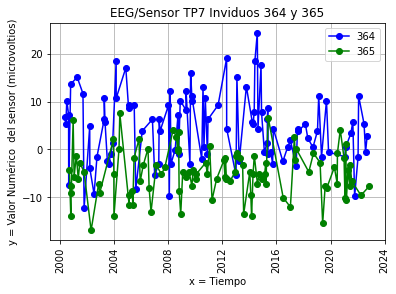

In [23]:
# Se importa el modulo pyplot de matplotlib
import matplotlib.pyplot as plt

# Se filtran el DataFrame para los valores en donde el codigo sea 60
df_subject364_sample = df_subject364[df_subject364["sensor_position"] == "TP7"].sample(n=100).sort_values(by="datetime")
df_subject365_sample = df_subject365[df_subject365["sensor_position"] == "TP7"].sample(n=100).sort_values(by="datetime")

#df_diabetes_measurement = df_diabetes_measurement.loc[(df_diabetes_measurement['datetime'] >= '1991-06-01') & (df_diabetes_measurement['datetime'] < '1991-07-01')]

# Se crea la grafica por medio del metodo plot
plt.plot(df_subject364_sample.datetime, df_subject364_sample.sensor_value, 'ob-')
plt.plot(df_subject365_sample.datetime, df_subject365_sample.sensor_value, 'og-')

# Se habilita la grilla
plt.grid(True)

# Se le da un nombre a los ejes
plt.xlabel('x = Tiempo')
plt.ylabel('y = Valor Numérico  del sensor (microvoltios)')

# Se le da un titulo a la grafica
plt.title('EEG/Sensor TP7 Inviduos 364 y 365')

# Se configura las leyendas de las lineas graficadas
plt.legend(['364', '365'])

# Se rotan las etiquetas del eje x 90
plt.xticks(rotation=90)

# Se visualiza la grafica
plt.show()

A pesar de que nuestra salida es la misma, las lineas tienen ahora un estilo diferente. Aqui el unico cambio fue el tercer argumento del metodo `plot`, en donde se pueden configurar las opciones de visualizaciones y estilos de las lineas. 

*Para saber como darle colores, estilos y marcadores a tus graficas lo mejores es que des [click aqui](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).*

Como vieron hay que hacer mucho trabajo para construir una gráfica de visualización directamente con `Matplotlib`, pero ¿qué tal si hay una manera más sencilla de lograrlo? Bueno seria por intermedio de librería de `DataFrames`, tan solo se necesitan una o un par de líneas de Código. miremos el ejemplo a continuación:

<AxesSubplot:xlabel='datetime'>

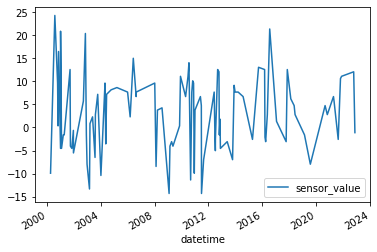

In [24]:
df_subject364_sample = df_subject364[df_subject364["sensor_position"] == "FP2"].sample(n=100).sort_values(by="datetime")
df_subject364_sample.plot(x="datetime", y="sensor_value")

### Gráficando con Pandas

Desde la librería de `Pandas` podemos invocar directamente la creación de una gráfica, como lo vimos en el anterior ejemplo. Lo interesante es que, los métodos más usuales de la librería, como lo son `Series` y `DataFrame` tiene su propio función `plot`, que no es más que una envoltura del método `plot` de `Matplotlib`.

#### Grafico de Barras

Otra de las visualizaciones más conocidas es el Grafico de Barras o en Ingles el **Bar Chart**. Por lo general estos son los tipos de visualizaciones con las que quizás más interactuamos y nos encontramos familiarizados, aunque no seamos tan letrados en el universo de las estadísticas, este es un gráfico que se entiende a primera vista.

Tratemos ahora de visualizar y resumir la información de nuestro dataset [adult](./data/adult.data):



In [25]:
import pandas as pd
import numpy as np

df_adults = pd.read_csv("./data/adult.data",
    names=['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry', 'income'],
    header=None,
    skipinitialspace=True
)

df_adults.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Empecemos graficando  el estado marital de los adultos presentes en el dataset:

<AxesSubplot:xlabel='maritalstatus'>

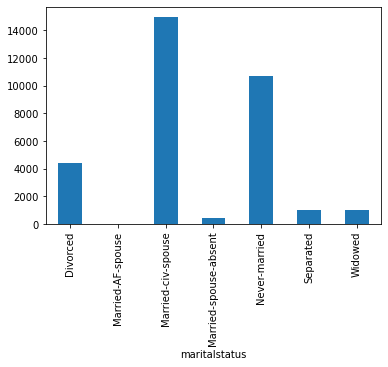

In [28]:
df_adults.groupby(["maritalstatus"]).agg("size").plot.bar(legend=False)

Ahora agreguemos dos plots, para saber quienes bajo la categoria del estado marital ganan entre **>= 50** y **<= 50**:

<AxesSubplot:xlabel='maritalstatus'>

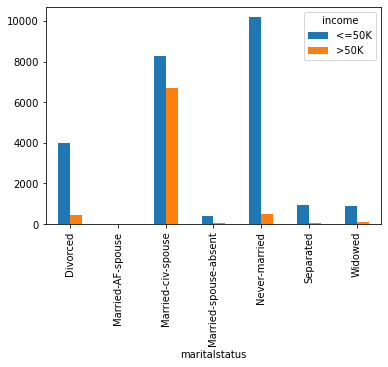

In [30]:
df_adults.groupby(['maritalstatus', 'income']).agg('size').unstack().plot.bar()

Ahora se puede apreciar cómo se distribuyen los ingresos dependiendo el estado marital, como se aprecia en el grafico anterior. Sera que para este tipo de visualizaciones sirve el grafico de barras? Bueno, otra de sus aplicaciones más comunes es sobre la visualización de distribuciones de probabilidad, veamos un ejemplo retomando el `Dataframe del EEG`.

<AxesSubplot:ylabel='Frequency'>

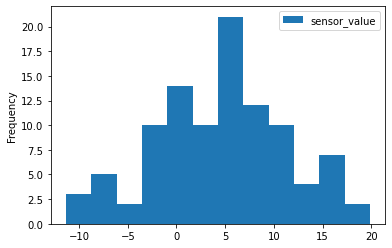

In [32]:
df_hist = df_subject364_sample = df_subject364[df_subject364["sensor_position"] == "FP1"].sample(n=100).sort_values(by="datetime")
df_hist.plot.hist(bins=12)

¿Y que distribución siguen los datos? ¿Una distribución normal o binomial? Veamos cómo se pueden visualizar las diferentes de distribuciones de los sensores de los individuos:

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

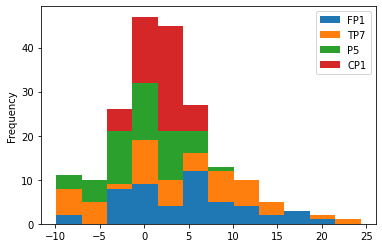

In [33]:
import matplotlib.pyplot as plt;

df = pd.DataFrame({
    "FP1": df_subject364[df_subject364["sensor_position"] == "FP1"]["sensor_value"].sample(n=50).values.tolist(),
    "TP7": df_subject364[df_subject364["sensor_position"] == "TP7"]["sensor_value"].sample(n=50).values.tolist(),
    "P5": df_subject364[df_subject364["sensor_position"] == "P5"]["sensor_value"].sample(n=50).values.tolist(),
    "CP1": df_subject364[df_subject364["sensor_position"] == "CP1"]["sensor_value"].sample(n=50).values.tolist()
})

plt.figure()

df.plot.hist(stacked=True, bins=12)


También es posible verlas por separado:

array([[<AxesSubplot:title={'center':'FP1'}>,
        <AxesSubplot:title={'center':'TP7'}>],
       [<AxesSubplot:title={'center':'P5'}>,
        <AxesSubplot:title={'center':'CP1'}>]], dtype=object)

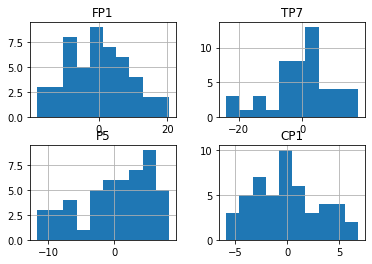

In [35]:
df.diff().hist()

#### Grafico de Pie con Pandas

Retomemos el dataset de `Adultos` y vamos a ver cuáles son las ocupaciones que tienen los adultos y  aquí es ideal el uso del famosísimo grafico de torta:


array([<AxesSubplot:ylabel='<=50K'>, <AxesSubplot:ylabel='>50K'>],
      dtype=object)

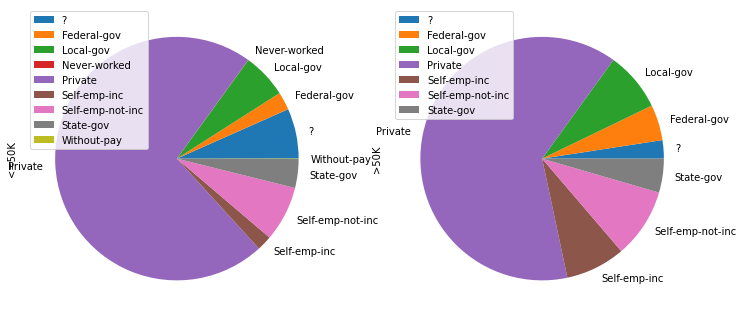

In [36]:
df_adults.groupby(["workclass", "income"]).agg("size").unstack().plot.pie(subplots=True, figsize=(12, 12), legend=True)

¿Ahora a la pregunta tendrá algo que ver la ocupación o el estado marital con el rango de ingresos? Y aquí es donde entra en juego la librería de `Seaborn`.

### Graficando con Seaborn

Bien, para graficar la relación de dos variables se hace uso del aclamado y venerado `Scatter Plot`, para ello vamos a trabajar ahora con el dataset de [iris](./data/iris.data), empecemos por importar sus datos:

In [44]:
import numpy as np

# Se importa la libreria Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# Se importa los datos del dataset y se convierten en un DataFrame.
df_iris = pd.read_csv("./data/iris.data", names=["largo_sepalo", "ancho_sepalo", "largo_petalo", "ancho_petalo", "clase"])
df_iris.head()

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Visualizamos la relación que existe entre el `largo_sepalo` y `ancho_sepalo`, para ello haremos del método `replot`:

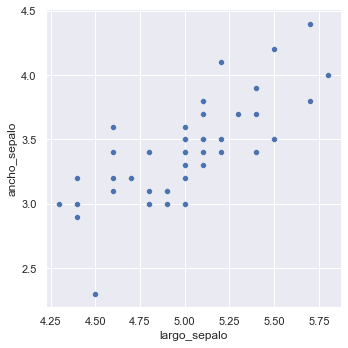

In [45]:

sns.relplot(data=df_iris.query('clase == "Iris-setosa"'), x="largo_sepalo", y="ancho_sepalo")

Esto en cierta medida, muestra la relación que existe entre el largo del pétalo y el ancho, es que claramente sigue una regresión lineal. Y nos tocaría hacer lo mismo por cada clase de iris.

Sera que podemos visualizar todo el dataset de una vez en una misma grafica?


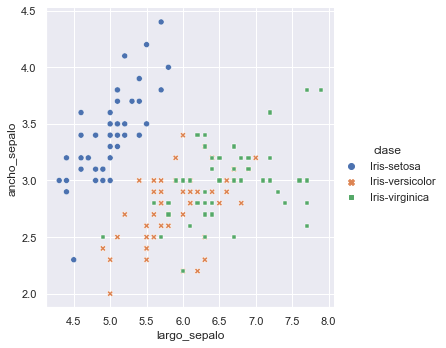

In [46]:
sns.relplot(data=df_iris, x="largo_sepalo", y="ancho_sepalo", hue="clase", style="clase")

Quizas un solo grafico sea complejo de leer.

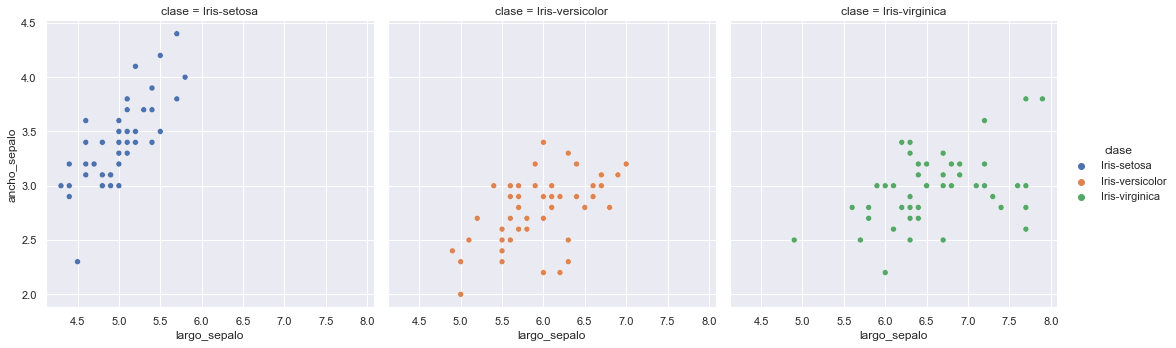

In [47]:
sns.relplot(data=df_iris, x="largo_sepalo", y="ancho_sepalo",  hue="clase", col="clase")

In [ ]:
# escalar los datos
# primero escalas los datos y luego se encuentra la media

Y ahora mejora su visualizacion? Y para finalizar, tratemos de comparar las clases de las florez por medio de un Grafico **Radar Plot**:

In [53]:
df_radar = df_iris.groupby(["clase"]).agg(["mean", "std"])
df_radar

largo_sepalo           ancho_sepalo           largo_petalo  \
                        mean       std         mean       std         mean   
clase                                                                        
Iris-setosa            5.006  0.352490        3.418  0.381024        1.464   
Iris-versicolor        5.936  0.516171        2.770  0.313798        4.260   
Iris-virginica         6.588  0.635880        2.974  0.322497        5.552   

                          ancho_petalo            
                      std         mean       std  
clase                                             
Iris-setosa      0.173511        0.244  0.107210  
Iris-versicolor  0.469911        1.326  0.197753  
Iris-virginica   0.551895        2.026  0.274650

In [51]:
# Normalize
df_radar = (df_radar - df_radar.mean())/df_radar.std()
df_radar

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo
clase,,,,
Iris-setosa,-1.053169,1.098620,-1.098136,-1.063342
Iris-versicolor,0.116553,-0.857165,0.239918,0.141828
Iris-virginica,0.936616,-0.241455,0.858218,0.921514


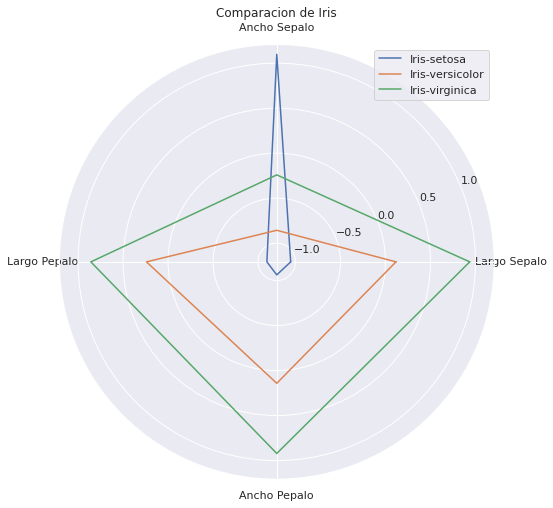

In [57]:
df_radar = df_iris.groupby(["clase"]).agg("mean")

# Normalize
df_radar = (df_radar - df_radar.mean())/df_radar.std()

# Se configuran las etiquetas
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len([*df_radar.iloc[[0]].values.tolist()[0], df_radar.iloc[[0]].values.tolist()[0][0]]))
plt.figure(figsize=(8, 8))

# Se crear el subplot
plt.subplot(polar=True)

# Por cada clase de iris se crea el plot
plt.plot(label_loc, [*df_radar.iloc[[0]].values.tolist()[0], df_radar.iloc[[0]].values.tolist()[0][0]], label="Iris-setosa")
plt.plot(label_loc, [*df_radar.iloc[[1]].values.tolist()[0], df_radar.iloc[[1]].values.tolist()[0][0]], label="Iris-versicolor")
plt.plot(label_loc, [*df_radar.iloc[[2]].values.tolist()[0], df_radar.iloc[[2]].values.tolist()[0][0]], label="Iris-virginica")

# Se organizan las etiquetas alrededor del grafico
plt.thetagrids(np.degrees(label_loc), labels=['Largo Sepalo', 'Ancho Sepalo', 'Largo Pepalo', 'Ancho Pepalo', ''])

# Se configura la presentacion y se visualiza el grafico
plt.title('Comparacion de Iris')
plt.legend()
plt.show()
